In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
df.drop(columns=["Unnamed: 0","Booking_ID"], inplace=True)

In [5]:
df.shape

(29020, 18)

In [6]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(7661)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(21359, 18)

In [10]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [11]:
df["no_of_adults"].value_counts()

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

In [12]:
df["no_of_children"].value_counts()


no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64

In [13]:
df["booking_status"].value_counts()


booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

In [14]:
cat_cols = ["type_of_meal_plan","required_car_parking_space","room_type_reserved","market_segment_type","repeated_guest","booking_status"]
num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights','no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [15]:
len(cat_cols)

6

#### Data analysis

In [16]:
data = df.copy()

### Univariate analysis

In [17]:
def num_plot_dist(df, num_features):
  fig, axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))

  if len(num_features)==1:
    axes=[axes]
  
  for i,column in enumerate(num_features):
    sns.histplot(data=df,x=column, ax=axes[i][0], kde=True, palette="Blues")
    axes[i][0].set_title(f"Histogram for {column}")

    sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
    axes[i][1].set_title(f"Boxplot for {column}")

    plt.tight_layout();



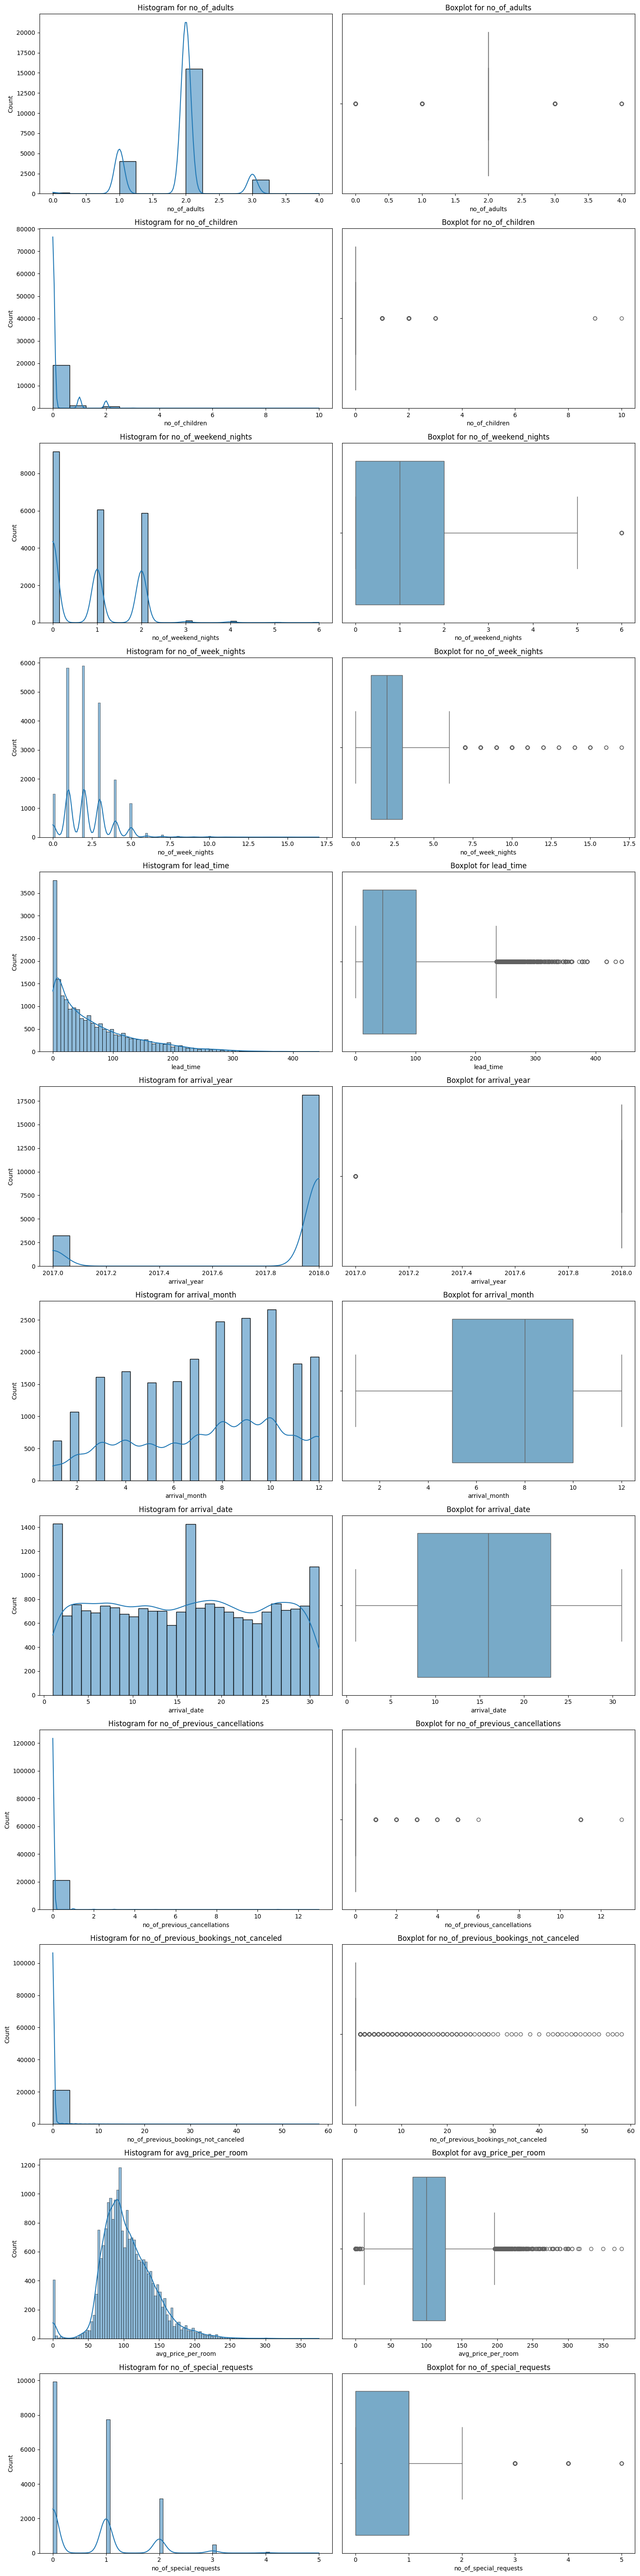

In [18]:
num_plot_dist(data,num_cols)

### Univariate analysis of cateogircal columns

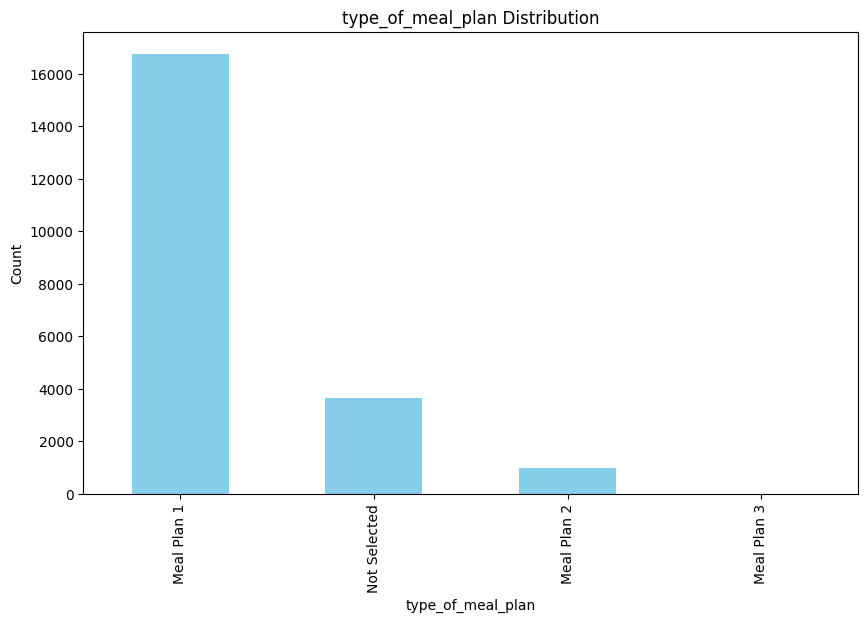

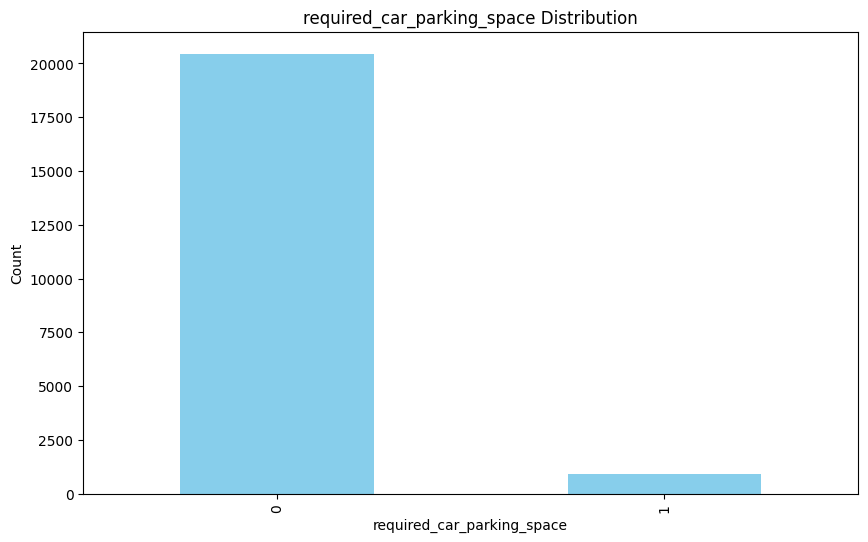

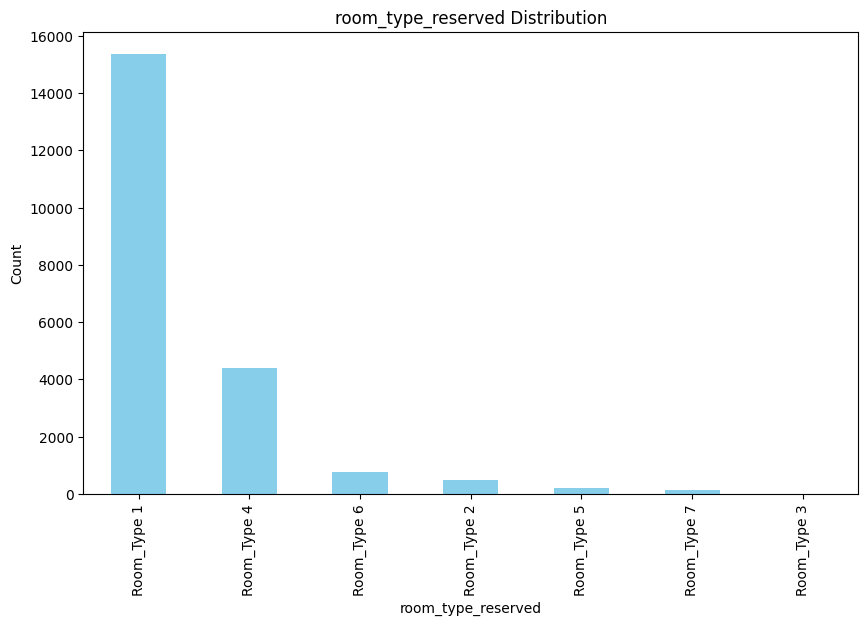

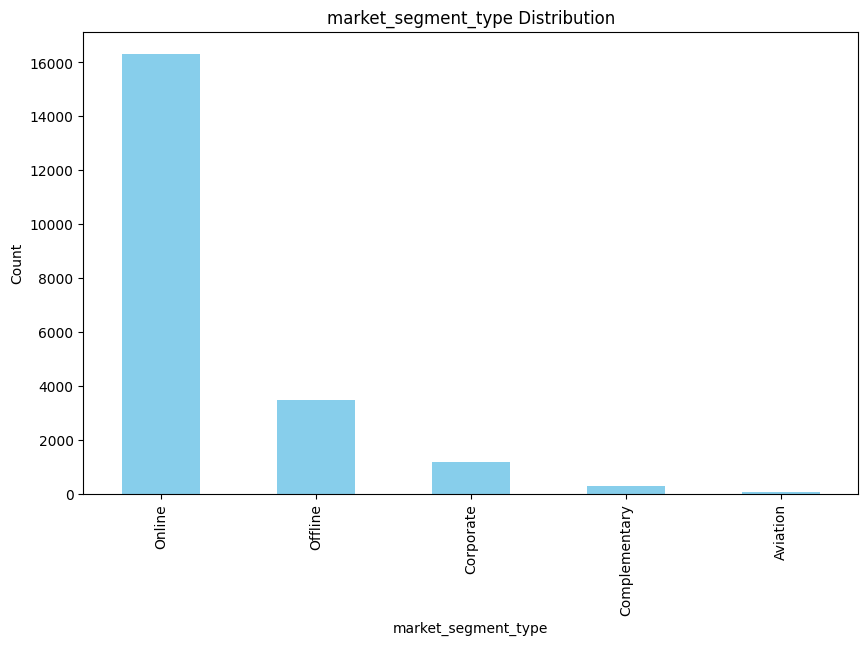

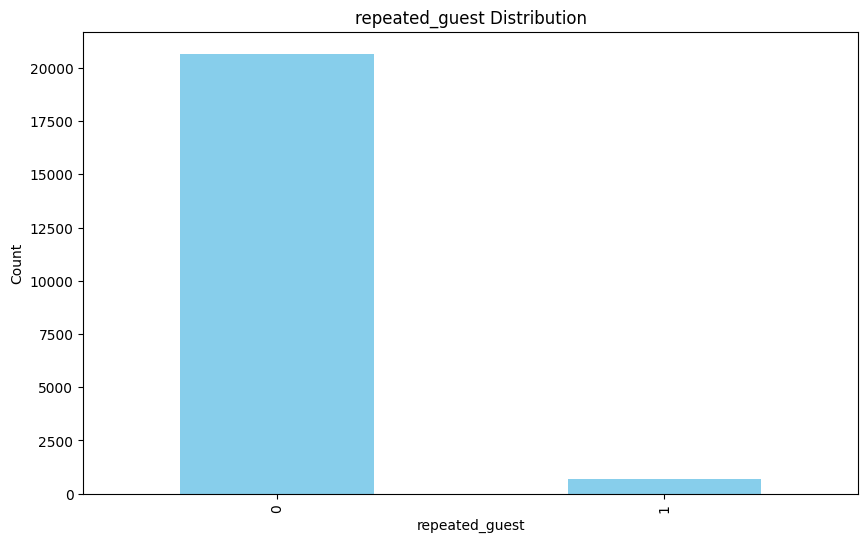

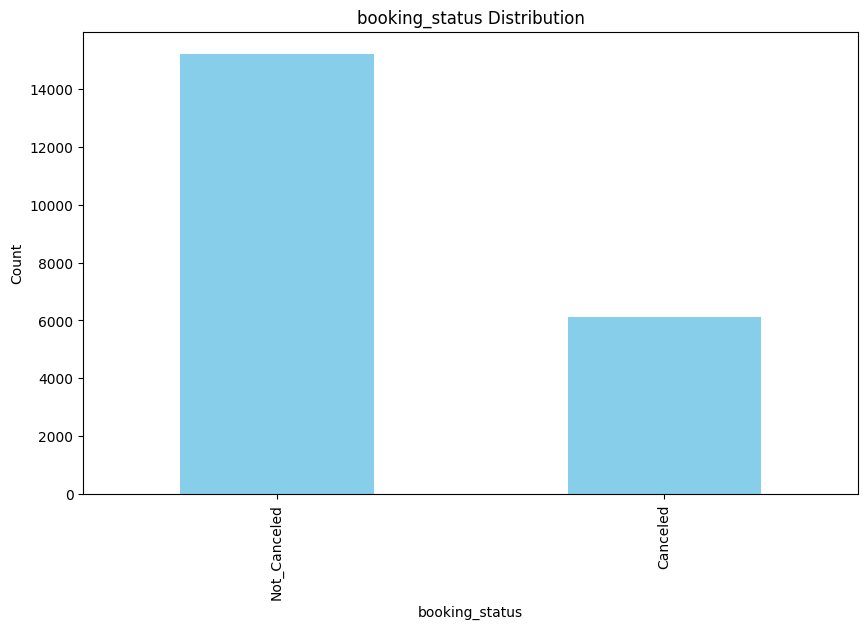

In [19]:
for cat_feature in cat_cols:
  plt.figure(figsize=(10,6))
  data[cat_feature].value_counts().plot(kind='bar', color='skyblue')
  plt.title(f"{cat_feature} Distribution")
  plt.xlabel(f"{cat_feature}")
  plt.ylabel("Count");

### Byvariate analysis

In [20]:
def plot_bivariate_num(df, target, num_features):
  num_plots = len(num_features)
  num_rows = (num_plots + 1)//2

  fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows*5))
  axes = axes.flatten()

  for i, column in enumerate(num_features):
    sns.boxplot(x=target, y=column,ax=axes[i], data=df, palette="Blues")
    axes[i].set_title(f"{column} VS {target}")

  plt.tight_layout();

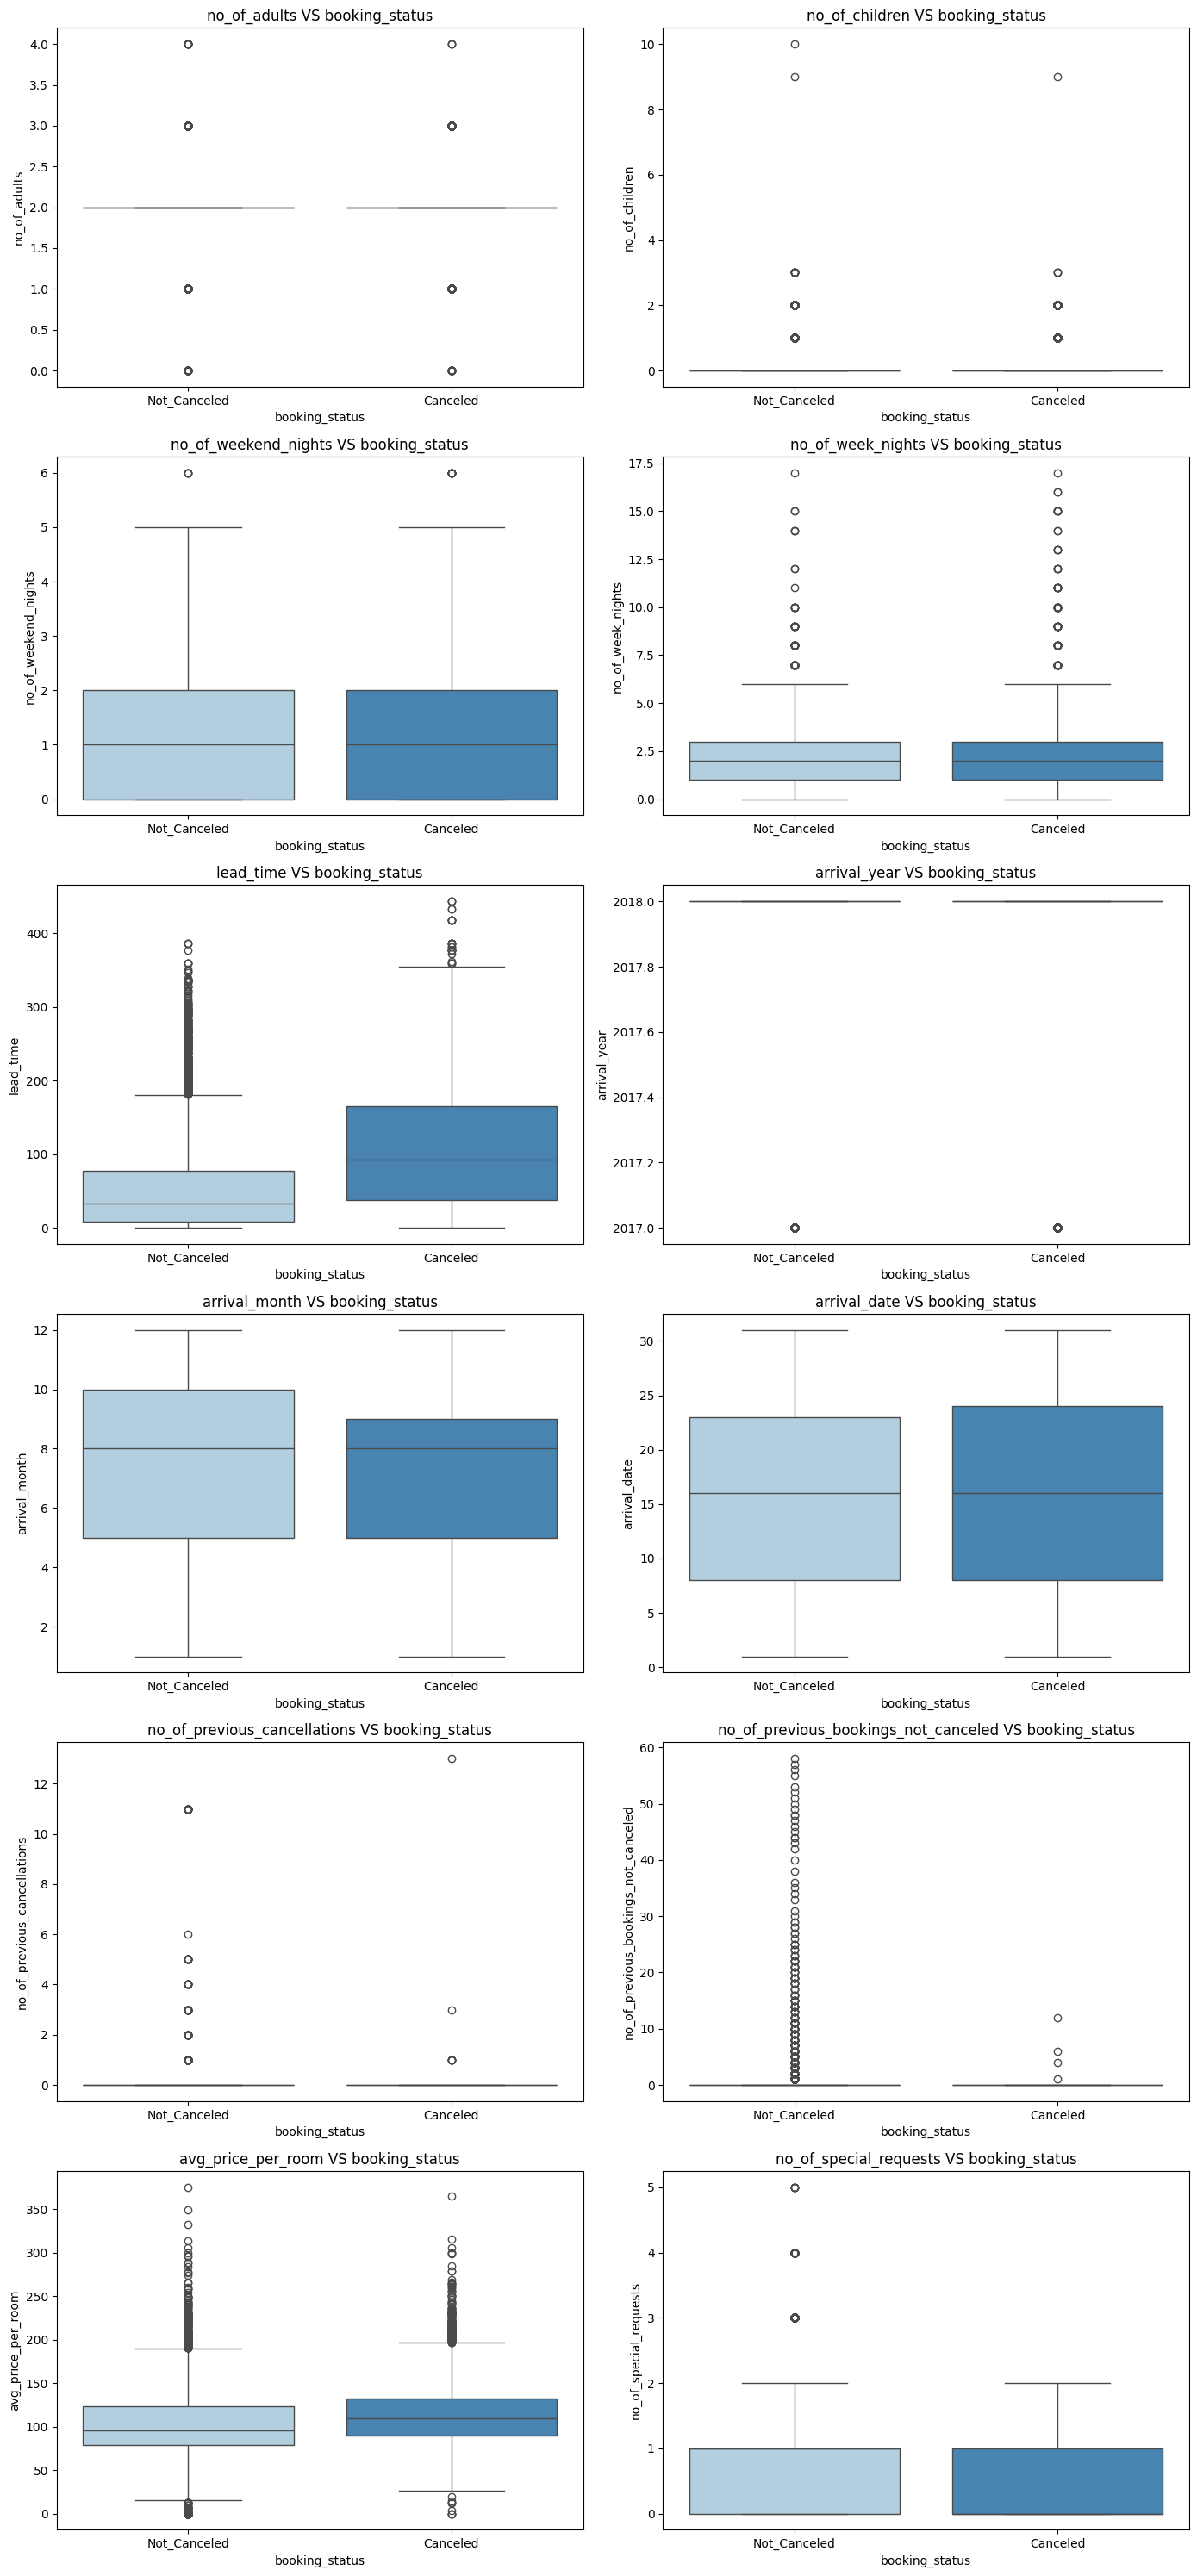

In [21]:
plot_bivariate_num(data, "booking_status", num_cols)

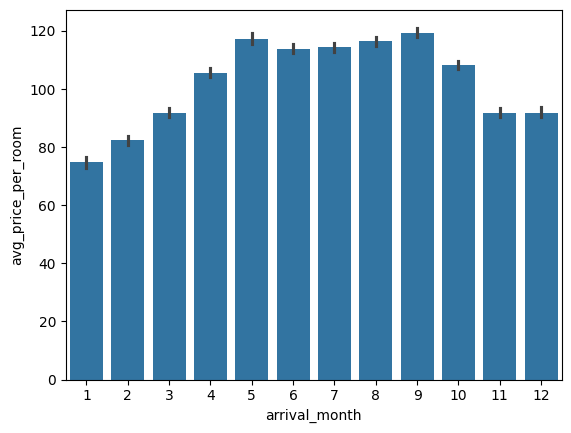

In [22]:
sns.barplot(x="arrival_month", y="avg_price_per_room", data=data);

In [23]:
def plot_bivariate_cat(df, target, cat_features):
  num_features = len(cat_features)
  num_rows = (num_features+1)//2

  fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows*5))
  axes = axes.flatten()

  for i, feature in enumerate(cat_features):
    sns.countplot(x=feature, hue=target, data=df, palette="Set2", ax = axes[i])
    axes[i].set_title(f"{feature} VS target")
    axes[i].tick_params(axis='x', rotation=90)

  plt.tight_layout();

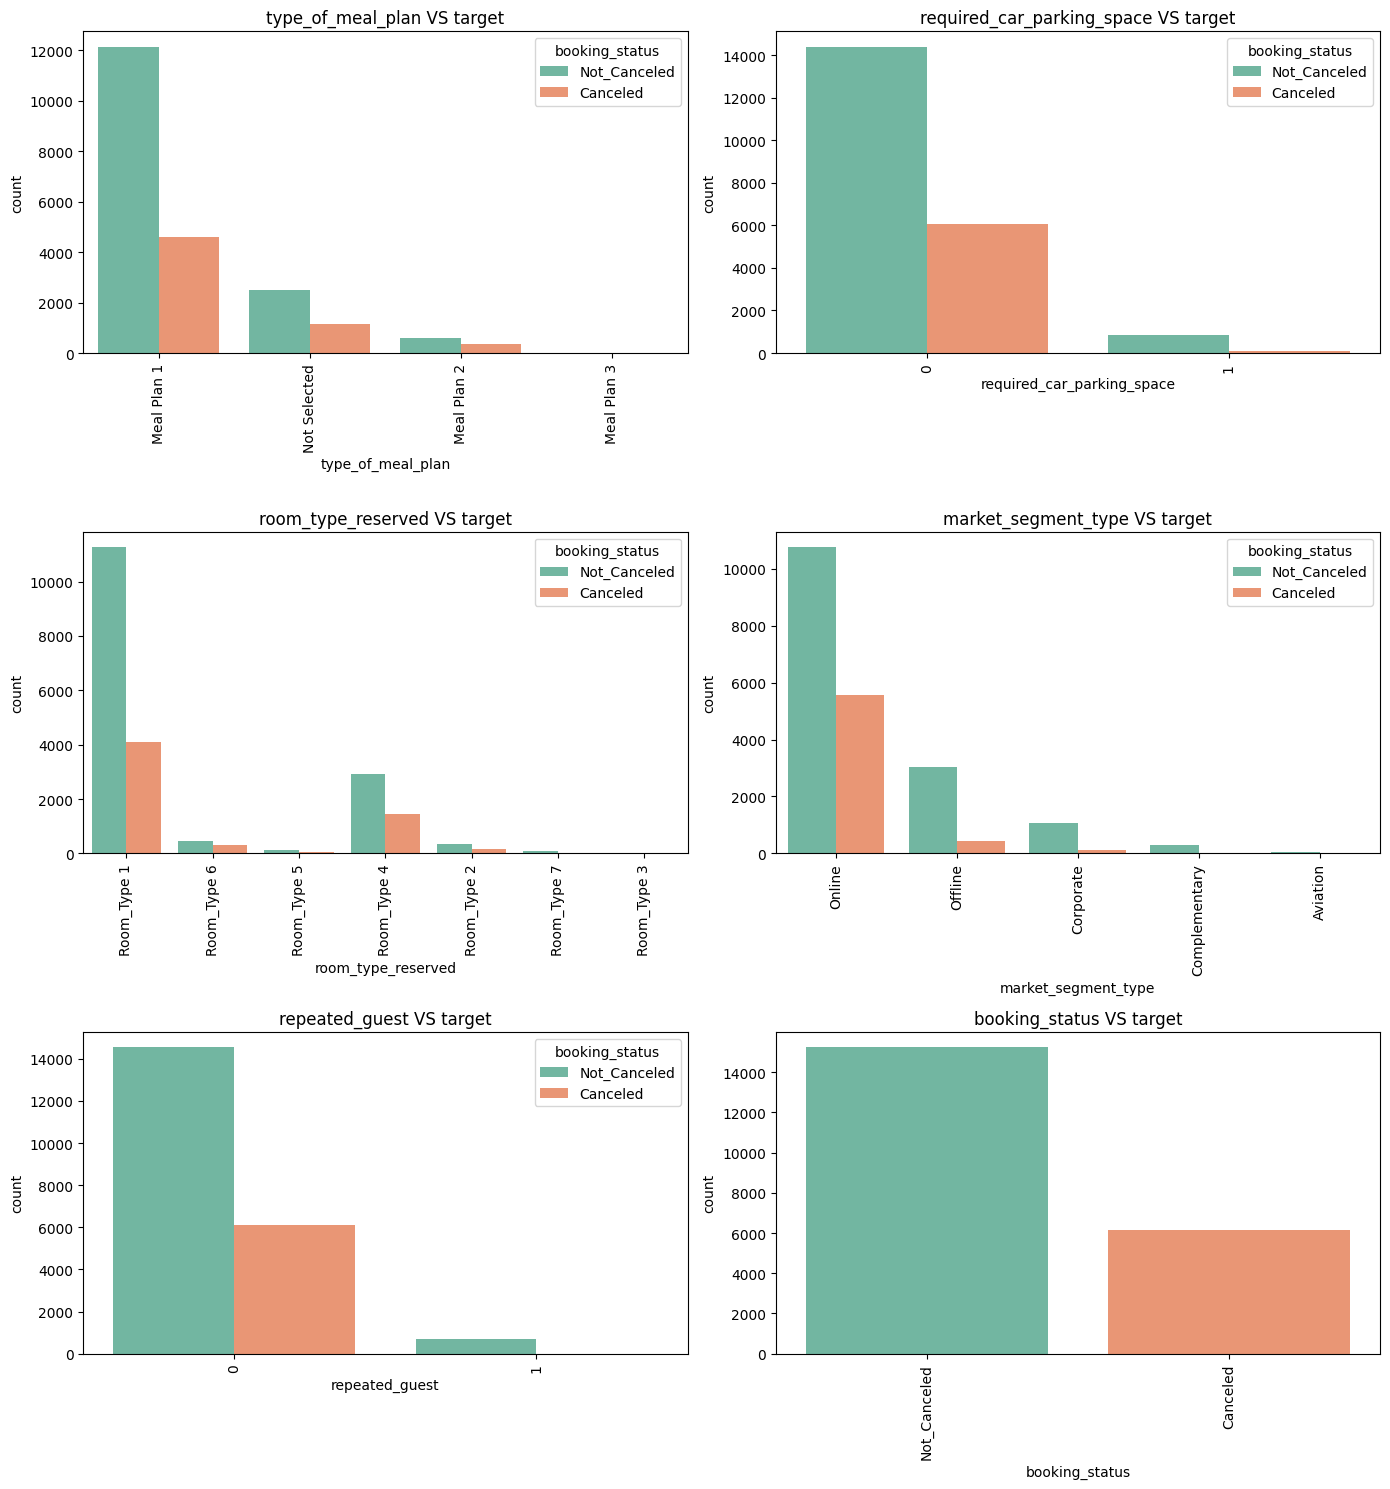

In [24]:
plot_bivariate_cat(data, 'booking_status', cat_cols)

In [25]:
### Data processing

In [26]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label_encoder = LabelEncoder()

mappings = {}

for col in cat_cols:
  df[col] = label_encoder.fit_transform(df[col])

  mappings[col] = {label: code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

In [30]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [32]:
!pip install statsmodels

You should consider upgrading via the '/home/juanpalms/Desktop/MLOPS/MLOPS_practice/hotel_reservation/hotel_reservation/bin/python -m pip install --upgrade pip' command.


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [34]:
X = add_constant(df)

In [35]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [36]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [37]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


In [38]:
corr = df.corr()

<Axes: >

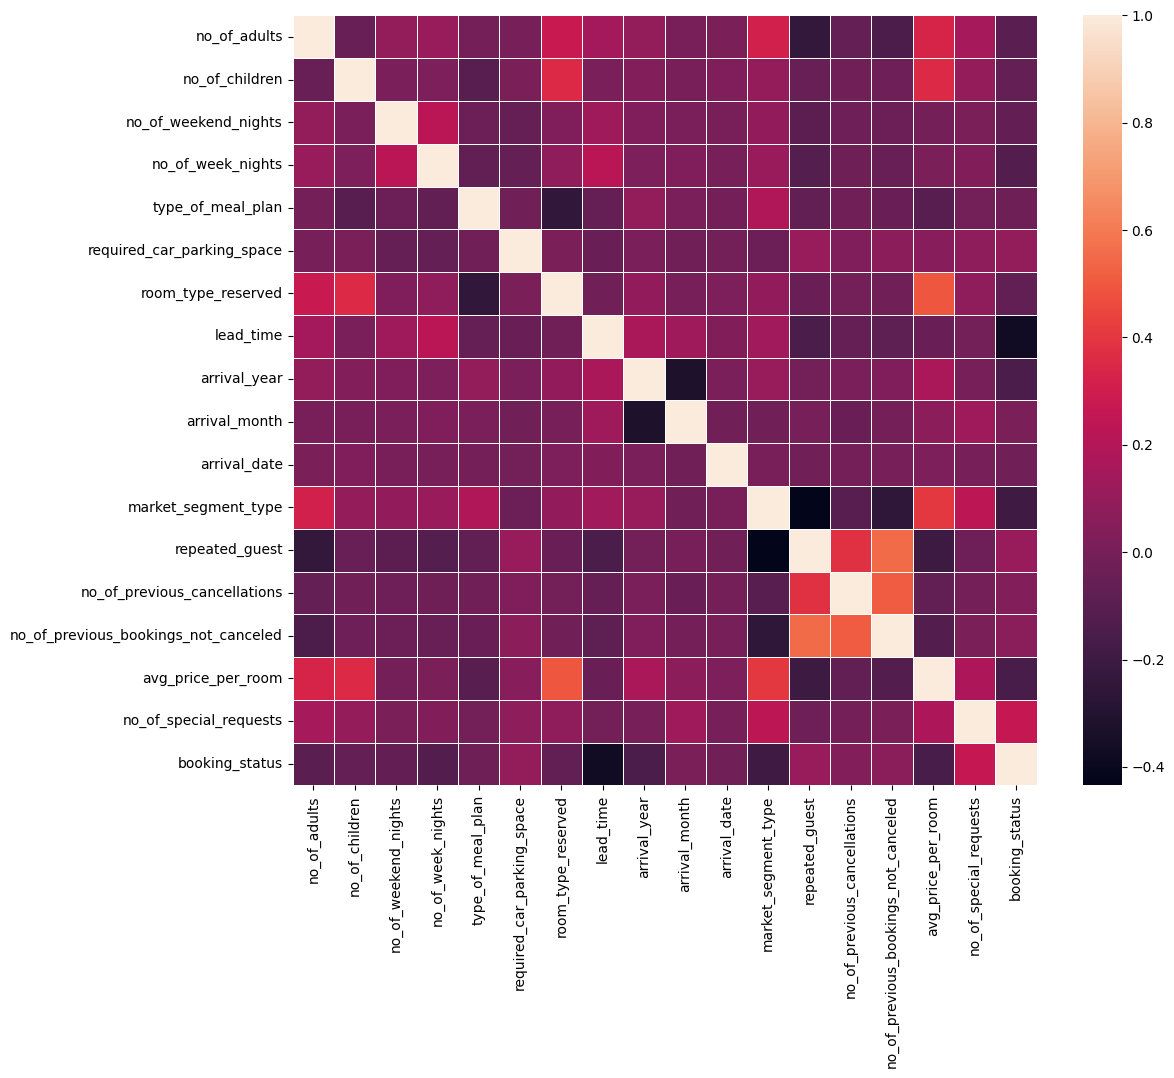

In [39]:
plt.figure(figsize = (12,10))
sns.heatmap(corr, linewidths=0.5)

In [43]:
skewness = df.skew()

In [44]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [42]:
for col in df.columns:
  if skewness[col] > 5:
    df[col] = np.log1p(df[col])

In [45]:
### Imbalanced data
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [47]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [48]:
X = df.drop(columns = 'booking_status')
y = df["booking_status"]

In [49]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [53]:
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 KB 689.7 kB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/home/juanpalms/Desktop/MLOPS/MLOPS_practice/hotel_reservation/hotel_reservation/bin/python -m pip install --upgrade pip' command.


In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
smote = SMOTE(random_state = 42)

In [58]:
X_res, y_res = smote.fit_resample(X,y)

In [60]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [62]:
df.shape

(21359, 18)

In [64]:
balanced_df = pd.DataFrame(X_res, columns =X.columns)
balanced_df["booking_status"] = y_res

In [65]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [66]:
balanced_df.shape

(30462, 18)

In [67]:
df = balanced_df.copy()

In [68]:
### Feature selection

len(df.columns)

18

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [73]:
model = RandomForestClassifier(random_state=42)
model.fit(X,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [74]:
feature_importance = model.feature_importances_

In [76]:
feature_importance_df = pd.DataFrame({'feature': X.columns,
                                      'importance': feature_importance})

In [83]:
top_features_importance_df = feature_importance_df.sort_values(by="importance", ascending=False)

In [84]:
len(df.columns)

18

In [88]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [89]:
len(top_10_df.columns)

11

In [90]:
df = top_10_df.copy()

In [91]:
!pip install xgboost lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 7.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 MB 6.4 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/home/juanpalms/Desktop/MLOPS/MLOPS_practice/hotel_reservation/hotel_reservation/bin/python -m pip install --upgrade pip' command.


### Model selection

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [103]:
classifiers = {
  "Random Forest" : RandomForestClassifier(random_state=42),
  "Logistic Regression": LogisticRegression(random_state = 42),
  "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42),
  #"Support Vector Classifier": SVC(random_state=42),
  "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
  #"KNN": KNeighborsClassifier(),
  "Naive Bayes": GaussianNB(),
  "XGboost": XGBClassifier(random_state=42),
  "Adaboost": AdaBoostClassifier(random_state =42),
  "LGBM": LGBMClassifier(random_state=42)
}

In [106]:
metrics = {
  "Model": [],
  "Accuracy": [],
  "Precision": [],
  "Recall": [],
  "F1 Score": []
}

In [107]:
for model_name, classifier in classifiers.items():
  #Train
  classifier.fit(X_train, y_train)
  #Classify
  y_pred = classifier.predict(X_test)
  
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  metrics["Model"].append(model_name)
  metrics["Accuracy"].append(accuracy)
  metrics["Precision"].append(precision)
  metrics["Recall"].append(recall)
  metrics["F1 Score"].append(f1)

[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [108]:
metrics_df = pd.DataFrame(metrics)

In [109]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.899557,0.900326,0.900326,0.900326
1,Logistic Regression,0.785492,0.790063,0.782085,0.786053
2,Gradient Boosting Classifier,0.847038,0.829938,0.875896,0.852298
3,Decision Tree Classifier,0.847202,0.856381,0.837134,0.846648
4,Naive Bayes,0.577056,0.906096,0.179153,0.299157
5,XGboost,0.883801,0.881460,0.888925,0.885177
6,Adaboost,0.799606,0.808475,0.789251,0.798747
7,LGBM,0.878057,0.865536,0.897394,0.881177


### Train our random forest model and hyper parameter tuning

In [110]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats  import randint

In [112]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [114]:
rf = RandomForestClassifier(random_state= 42)

In [115]:
params_dic = {
  'n_estimators': randint(100,500),
  'max_depth': randint(10,50),
  'min_samples_split': randint(2,10),
  'min_samples_leaf': randint(1,5),
  'bootstrap': [True,False] 
}

In [116]:
random_search = RandomizedSearchCV(estimator = rf, 
                                   param_distributions= params_dic,
                                   n_iter= 5,
                                   cv = 5,
                                   verbose = 2,
                                   random_state = 42,
                                   scoring = 'accuracy')

In [117]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.0s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  11.2s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  11.2s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  11.1s
[CV]

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....x7fb2c76d9000>, 'min_samples_leaf': <scipy.stats....x7fb2c76d8b50>, 'min_samples_split': <scipy.stats....x7fb2c76d9c30>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [118]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [119]:
best_rf_model = random_search.best_estimator_

In [120]:
y_pred = best_rf_model.predict(X_test)

In [121]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [122]:
accuracy

0.8921713441654358

In [123]:
precision

0.8898222940226171

In [124]:
recall

0.8970684039087948

In [125]:
f1

0.8934306569343066

In [126]:
import joblib

In [127]:
joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [128]:
## Load model

loaded_model = joblib.load("random_forest.pkl")

In [129]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [132]:
new_data = np.array([190,	1,	93.5,	9,	8,	4,	5,	2,	0,	0 ]).reshape(1,-1)
predictions = loaded_model.predict(new_data)

In [133]:
predictions

array([1])